<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [45]:
#This code below checks if TensorFlow is able to identify the GPU by DeepLizard
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [46]:
# pic = load_img('/Users/sophie/Desktop/Mushrooms_Pictures/Test/Not_Poisonous/000_pIBnrKk4HoA.jpg')
# pic.getpixel
# pic_array = img_to_array(pic)
# pic_array.shape
# pic

In [539]:
train_path = '/Users/sophie/Desktop/test_image/Training'
valid_path = '/Users/sophie/Desktop/test_image/Validation'
test_path = '/Users/sophie/Desktop/test_image/Test'

image_gen = ImageDataGenerator(rescale= 1. /255) # create a data generator rescale= 1. /255

training_generator = image_gen.flow_from_directory(
    train_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size= 962
)
validation_generator = image_gen.flow_from_directory(
    valid_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=206
)

test_generator = image_gen.flow_from_directory(
    test_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=206
)

X_train, y_train = training_generator.next()
print(f'This is the X_train: Batch shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))

X_validation, y_validation = validation_generator.next()
print(f'This is the X_validation: Batch shape=%s, min=%.3f, max=%.3f' % (X_validation.shape, X_validation.min(), X_validation.max()))


X_test, y_test = test_generator.next()
print(f'This is the X_test: Batch shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))
print(y_test)


Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
This is the X_train: Batch shape=(962, 256, 256, 3), min=0.000, max=1.000
This is the X_validation: Batch shape=(206, 256, 256, 3), min=0.000, max=1.000
This is the X_test: Batch shape=(206, 256, 256, 3), min=0.000, max=1.000
[1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]


# STEP 2: VISUALIZE DATA

In [214]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

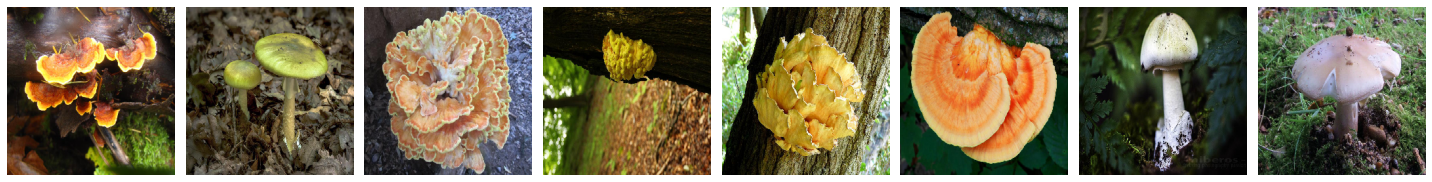

[0. 1. 0. 0. 0. 0. 1. 1.]


In [215]:
plotImages(X_train)
print(y_train[:8])

### 0 = Not Poisonous and 1 = Poisonous

# STEP 3: DATA PREPARATION

In [216]:
# get the shape without the sampling
Input_shape = X_train.shape[1:]
Input_shape

(256, 256, 3)

# STEP 4: TRAIN THE MODEL

In [217]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [218]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=64, activation='relu'))

cnn_model.add(Dense(units=32, activation='relu'))

cnn_model.add(Dense(units=2, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
average_pooling2d_25 (Averag (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_26 (Averag (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 123008)          

In [219]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])

In [235]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=20,
                        batch_size=50,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 962 samples, validate on 206 samples
Epoch 1/20
962/962 [==============================] - 35s 37ms/step - loss: 0.4797 - accuracy: 0.7879 - val_loss: 0.4584 - val_accuracy: 0.7864
Epoch 2/20
962/962 [==============================] - 39s 41ms/step - loss: 0.3844 - accuracy: 0.8306 - val_loss: 0.4017 - val_accuracy: 0.8398
Epoch 3/20
962/962 [==============================] - 32s 33ms/step - loss: 0.3349 - accuracy: 0.8545 - val_loss: 0.3872 - val_accuracy: 0.8350
Epoch 4/20
962/962 [==============================] - 32s 33ms/step - loss: 0.2892 - accuracy: 0.8877 - val_loss: 0.3501 - val_accuracy: 0.8398
Epoch 5/20
962/962 [==============================] - 32s 33ms/step - loss: 0.2634 - accuracy: 0.8940 - val_loss: 0.3753 - val_accuracy: 0.8447
Epoch 6/20
962/962 [==============================] - 30s 31ms/step - loss: 0.2473 - accuracy: 0.9002 - val_loss: 0.4480 - val_accuracy: 0.7864
Epoch 7/20
962/962 [==============================] - 30s 31ms/step - loss: 0.2288 - accur

# STEP 5: EVALUATE THE MODEL

In [540]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print(score)

[0.40746644631172846, 0.8834951519966125]


In [541]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8835


In [238]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

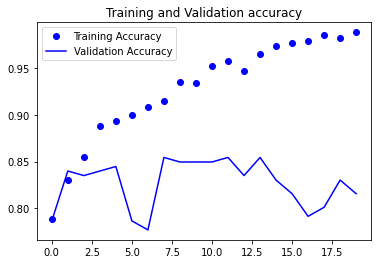

In [239]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

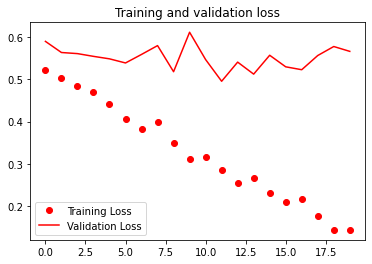

In [23]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [542]:
y_predict = cnn_model.predict(X_test)
y_pred = y_predict[:,1]

In [543]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
print(predicted_classes)
#get the indices to be plotted
print(y_test)

[1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1]
[1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 

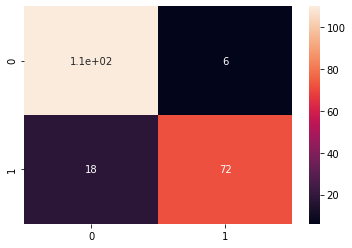

In [558]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True)

Predicted Poisonous and turns out to be poisonous (correct):  <br>
Predicted Poisonous and turns out to be not poisonous: <br>
Predicted Not Poisonous and turns out to be poisonous: <br>
Predicted Not Poisonous and turns out to be not poisonous(correct): <br>

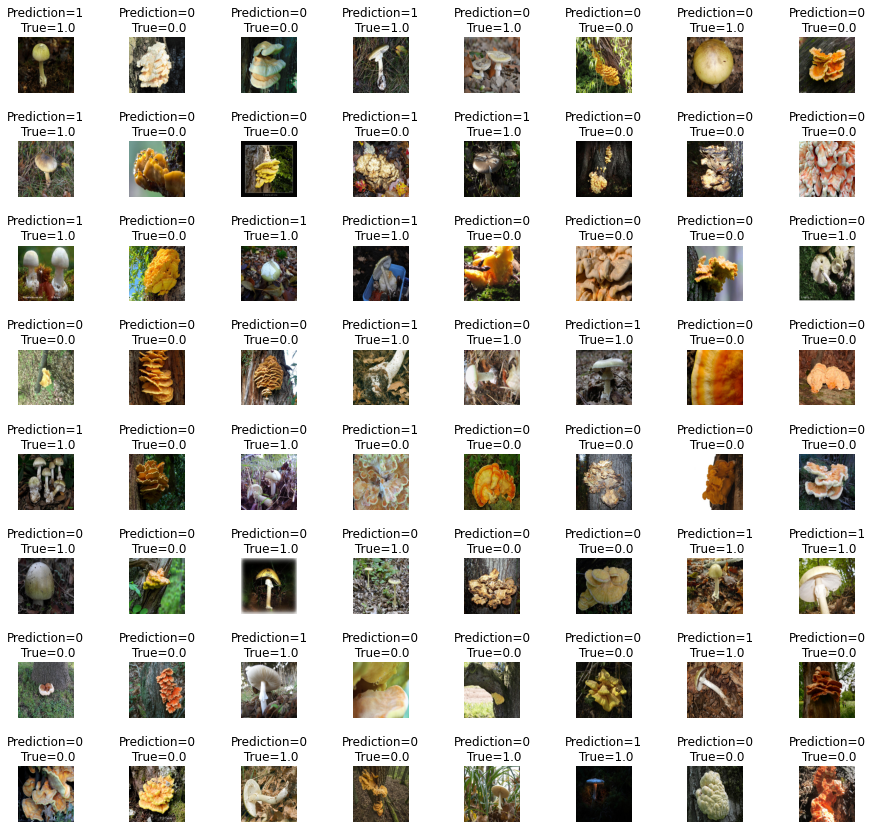

In [243]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
# will reference 

# STEP 6: CHANGING THE THRESHOLD

In [247]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [234]:
print(y_pred)

[0.45335436 0.5755656  0.52676994 0.5956702  0.5462163  0.2515013
 0.3120795  0.20871355 0.5041496  0.20866416 0.28499746 0.36627832
 0.54219365 0.4831733  0.53919435 0.42856482 0.4693007  0.10452513
 0.60962284 0.618607   0.24110477 0.3109305  0.3445005  0.57002604
 0.35839045 0.20965834 0.2737831  0.52121645 0.37139204 0.5972208
 0.12539853 0.24728583 0.5964957  0.3086796  0.68596846 0.49561262
 0.13013585 0.6027799  0.19778538 0.5667943  0.5620389  0.34284922
 0.40521285 0.48329446 0.43566844 0.33884054 0.39939624 0.61393017
 0.513094   0.46180725 0.53149337 0.28277054 0.39009494 0.2526151
 0.42115226 0.3216964  0.42791352 0.24944912 0.36569113 0.3249917
 0.41437042 0.51519346 0.4957058  0.30361143 0.15456428 0.41841325
 0.59884775 0.38020575 0.3195995  0.20801662 0.6112683  0.3308488
 0.45620504 0.56933385 0.5247132  0.26421314 0.47541752 0.54545087
 0.4949654  0.5752683  0.54543376 0.663538   0.31173247 0.39541563
 0.15943123 0.18480827 0.54845834 0.43370876 0.23591264 0.17602016


In [244]:
precision_score(y_test, predicted_classes)

0.9523809523809523

Interpretation: 

In [245]:
recall_score(y_test, predicted_classes)

0.6666666666666666

Interpretation: 

In [248]:
f1_score(y_test, predicted_classes)

0.7843137254901961

Interpretation: 

In [249]:
# Make probabilistic predictions (scores)
y_proba = cnn_model.predict_proba(X_test)[:,1]

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.9523809523809523
Recall score: 0.6666666666666666

Threshold of 0.2:
Precision score: 0.9166666666666666
Recall score: 0.8555555555555555


In [251]:
print(y_proba)

[9.40683246e-01 5.57846762e-03 1.37320399e-01 9.90948021e-01
 4.48673785e-01 9.13345648e-05 1.62816292e-03 1.01070168e-06
 6.49553299e-01 5.89495642e-07 2.02114214e-04 6.32495284e-01
 8.53971064e-01 1.18031710e-01 3.57539323e-03 2.05358583e-02
 9.49133158e-01 5.49100534e-08 9.89226401e-01 9.40772653e-01
 2.03333519e-04 3.65612894e-01 3.70564464e-07 4.95957702e-01
 3.05488724e-02 4.18552663e-05 2.30933210e-06 9.01191711e-01
 3.87080222e-01 9.45532918e-01 7.43753160e-04 1.48669831e-04
 9.88805294e-01 3.68185155e-03 2.56319106e-01 5.11955023e-01
 2.48142919e-06 5.69637166e-03 3.64032900e-07 4.90161823e-03
 3.43206763e-01 2.64944835e-03 2.87872590e-02 1.22374520e-01
 5.79459811e-05 4.77702910e-04 6.92743897e-01 9.98747945e-01
 3.57616916e-02 5.69338538e-02 7.92158365e-01 3.35149118e-04
 6.02241680e-02 1.07832377e-04 7.84096003e-01 3.30470828e-03
 3.36389337e-03 1.23914640e-06 9.63525176e-02 7.12943077e-03
 2.63277180e-02 9.34582233e-01 2.47239247e-02 2.38209032e-06
 1.95694884e-05 1.437988

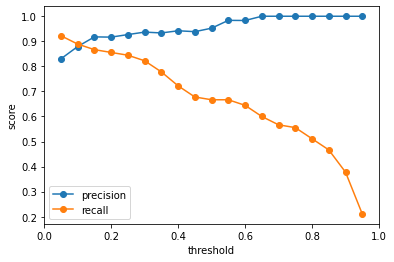

In [250]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

# STEP 7: MODEL AUGMENTATION

**Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, shifting, changing the brightness and rotating the original images.**


In [275]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_validation = X_validation.astype('float32')

In [276]:
X_train.shape

(962, 256, 256, 3)

# DATA VISUALIZATION FOR AUGMENTED IMAGES

In [316]:
# n represents 10 images for each batch
n = 10

X_train_sample = X_train[:n]

In [317]:
X_train_sample.shape

(10, 256, 256, 3)

In [330]:
dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

In [331]:
from keras.preprocessing.image import array_to_img

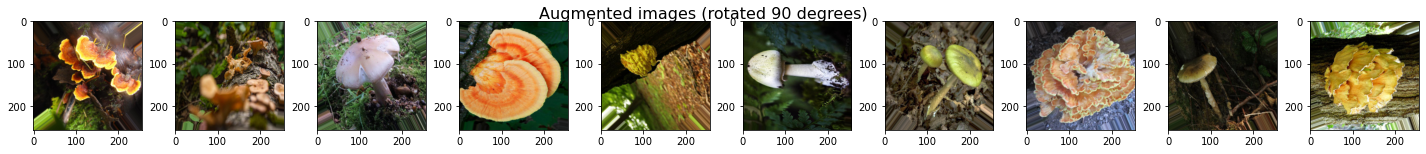

In [332]:
fig = plt.figure(figsize = (25,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)', fontsize=16)
     plt.show()
     break;


# MODEL TRAINING WITH THE AUGMENTED DATASET

In [333]:
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True
                             )

In [334]:
datagen.fit(X_train)

In [336]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2, validation_data = (X_validation,y_validation))

Epoch 1/2
31/31 [==============================] - 37s 1s/step - loss: 0.2448 - accuracy: 0.8940 - val_loss: 0.3767 - val_accuracy: 0.8301
Epoch 2/2
31/31 [==============================] - 34s 1s/step - loss: 0.2813 - accuracy: 0.8794 - val_loss: 0.2824 - val_accuracy: 0.8689


In [337]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

206/206 [==============================] - 3s 15ms/step
Test accuracy 0.9126213788986206


# STEP 8: VGG16 MODEL

**How to fine-tune a pre-trained model, called VGG16, that we'll modify to predict on images of cats and dogs with TensorFlow's Keras API.**

# CREATING THE MODEL

In [378]:
#Keras has a library of pre-trained model able to pull down for fine tuning 
vgg16_model = keras.applications.vgg16.VGG16()

In [382]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**The last layer has 1000 layers and I will not classifying on 1000 categories. My model will only have 2 categories.**

In [381]:
vgg16_model.layers.pop()

In [385]:
# Sequential
new_model = keras.Sequential() 
for layer in vgg16_model.layers: # iterate all throughout the VGG Model and add the sequential layer to it
    new_model.add(layer)

In [386]:
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [387]:
# exclude from future training, good for fine tuning - exactly how they are in terms of their weight 
for layer in model.layers:
    layer.trainable = False 

In [391]:
new_model.add(Dense(2, activation='softmax'))

In [392]:
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

# TRAIN THE FINE-TUNED NEW_MODEL 

In [515]:
train_path = '/Users/sophie/Desktop/test_image/Training'
valid_path = '/Users/sophie/Desktop/test_image/Validation'
test_path = '/Users/sophie/Desktop/test_image/Test'

image_gen = ImageDataGenerator() # create a data generator rescale= 1. /255

train_batches = image_gen.flow_from_directory(
    train_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=48 # change this to a smaller number for plotting such as 20
)
validation_batches = image_gen.flow_from_directory(
    valid_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=10 # change this to a smaller number when plotting also around 20 for visibility 
)

test_batches = image_gen.flow_from_directory(
    test_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=206 # change this to a lower number for plotting 
)

Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [393]:
new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [469]:
history_new = new_model.fit_generator(train_batches,
                        steps_per_epoch=20,
                        validation_data = validation_batches,
                        validation_steps=20,
                        epochs=1,
                        verbose=1)

Epoch 1/1
30/30 [==============================] - 293s 10s/step - loss: 0.1877 - accuracy: 0.9441 - val_loss: 7.5896e-06 - val_accuracy: 0.9444


# FINE-TUNED MODEL EVALUATION 

In [546]:
X_test_new, y_test_new = next(test_batches)

In [547]:
def plotImages2(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = np.array(img).astype(np.uint8)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

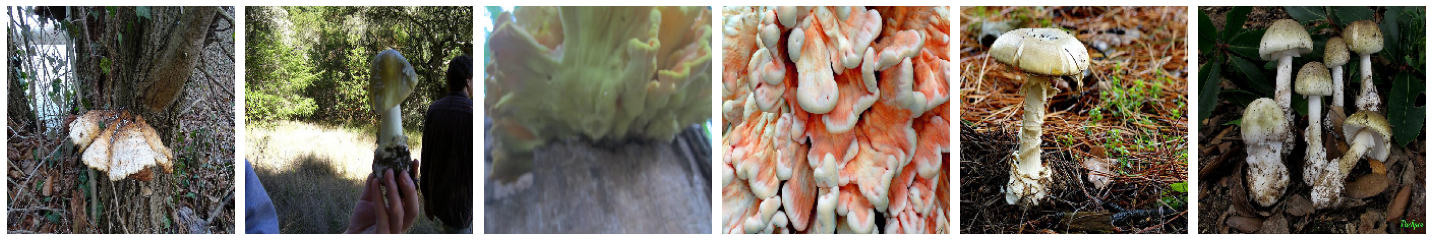

[0. 1. 0. 0. 1. 1.]


In [565]:
plotImages2(X_test_new)
y_test2 = y_test_new[:,0]
print(y_test2[:6])

### 0 is not poisonous and 1 is poisonous

In [574]:
print(y_test2)

[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [550]:
score = new_model.evaluate(X_test_new, y_test_new,verbose=0)

In [551]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9417


In [575]:
predictions = new_model.predict_generator(test_batches, steps=1, verbose=0)

In [576]:
cm2 = confusion_matrix(y_test2, np.round(predictions[:,0]))

In [577]:
cm2

array([[109,   7],
       [  5,  85]])

In [581]:
new_model_cm2 = pd.DataFrame(cm2)
new_model_cm2

,0,1
0,109,7
1,5,85


In [583]:
new_model_cm2.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm2_df = new_model_cm2.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm2_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,109,7
Actually Poisonous,5,85
